In [167]:
import pandas as pd
import re
from datetime import datetime
pattern="\s+"

df=pd.read_csv("turboaz.csv")
data=df[["Buraxilish ili","Yurush","Qiymet"]]
data.iloc[:,1] = data.iloc[:,1].apply(lambda x:int("".join(re.split(pattern,x)[:-1])))
data.loc[:,"Buraxilish ili"]=data.loc[:,"Buraxilish ili"].apply(lambda x:int(x))

/tmp/ipykernel_18011/86120159.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,1] = data.iloc[:,1].apply(lambda x:int("".join(re.split(pattern,x)[:-1])))
/tmp/ipykernel_18011/86120159.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,1] = data.iloc[:,1].apply(lambda x:int("".join(re.split(pattern,x)[:-1])))
/tmp/ipykernel_18011/86120159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [168]:
def clean_price_and_convert(col:str):
    col=re.split("\s+",col)
    if col[-1]=="$":
        return float(col[0])*1.70
    return float(col[0])
        
data.loc[:,"Qiymet"]=data["Qiymet"].apply(clean_price_and_convert)

/tmp/ipykernel_18011/3661051641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"Qiymet"]=data["Qiymet"].apply(clean_price_and_convert)
/tmp/ipykernel_18011/3661051641.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,"Qiymet"]=data["Qiymet"].apply(clean_price_and_convert)


In [49]:
data

,Buraxilish ili,Yurush,Qiymet
0,24,366000,12500.0
1,9,102000,53550.0
2,21,469700,11700.0
3,25,556680,9700.0
4,23,300000,12700.0
...,...,...,...
1323,27,325000,8800.0
1324,29,280000,6300.0
1325,25,272000,10900.0
1326,23,207000,11300.0


In [6]:
data["Yurush"]

0       366000
1       102000
2       469700
3       556680
4       300000
         ...  
1323    325000
1324    280000
1325    272000
1326    207000
1327    255700
Name: Yurush, Length: 1328, dtype: int64

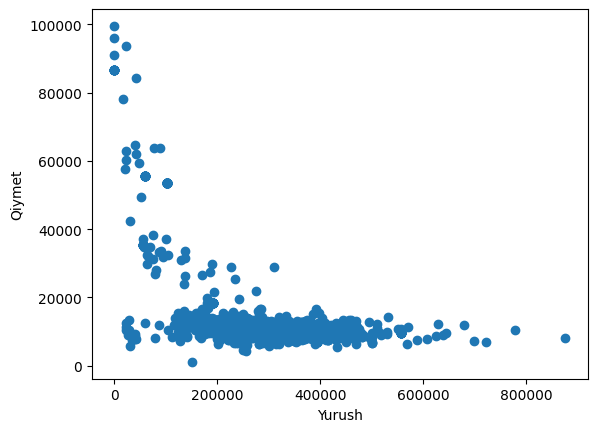

In [169]:
import matplotlib.pyplot as plt
plt.scatter(data["Yurush"],data["Qiymet"])
plt.ylabel("Qiymet")
plt.xlabel("Yurush")
plt.show()

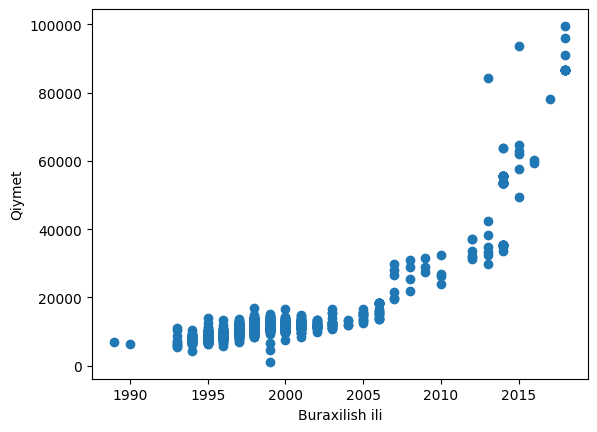

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0
...,...,...,...
1323,1996,325000,8800.0
1324,1994,280000,6300.0
1325,1998,272000,10900.0
1326,2000,207000,11300.0


In [170]:
plt.scatter(data["Buraxilish ili"],data["Qiymet"])
plt.ylabel("Qiymet")
plt.xlabel("Buraxilish ili")
plt.show()
data

In [171]:
def normalize_data(col):
    print(col.max()-col.min())
    return (col-col.mean())/(col.std())

In [172]:
data_r=data.copy()
data["Yurush"]=normalize_data(data["Yurush"])
data["Buraxilish ili"]=normalize_data(data["Buraxilish ili"])
data["Qiymet"]=normalize_data(data["Qiymet"])
data

876000
29
98370.0


/tmp/ipykernel_18011/2948235354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Yurush"]=normalize_data(data["Yurush"])
/tmp/ipykernel_18011/2948235354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Buraxilish ili"]=normalize_data(data["Buraxilish ili"])
/tmp/ipykernel_18011/2948235354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Buraxilish ili,Yurush,Qiymet
0,-0.162484,0.715888,-0.191676
1,2.652017,-1.472811,2.815558
2,0.400416,1.575615,-0.250282
3,-0.350117,2.296725,-0.396798
4,0.025150,0.168713,-0.177024
...,...,...,...
1323,-0.725384,0.375976,-0.462730
1324,-1.100651,0.002902,-0.645874
1325,-0.350117,-0.063422,-0.308888
1326,0.025150,-0.602306,-0.279585


In [173]:
data

,Buraxilish ili,Yurush,Qiymet
0,-0.162484,0.715888,-0.191676
1,2.652017,-1.472811,2.815558
2,0.400416,1.575615,-0.250282
3,-0.350117,2.296725,-0.396798
4,0.025150,0.168713,-0.177024
...,...,...,...
1323,-0.725384,0.375976,-0.462730
1324,-1.100651,0.002902,-0.645874
1325,-0.350117,-0.063422,-0.308888
1326,0.025150,-0.602306,-0.279585


In [69]:
import numpy as np

In [174]:
x0=[1]*len(data)
x1=data["Buraxilish ili"]
x2=data["Yurush"]
y=data["Qiymet"]
X=np.array([x0,x1,x2]).T
W=np.array([0,11,5])
X

array([[ 1.        , -0.16248371,  0.71588757],
       [ 1.        ,  2.65201669, -1.4728113 ],
       [ 1.        ,  0.40041637,  1.57561512],
       ...,
       [ 1.        , -0.35011707, -0.06342187],
       [ 1.        ,  0.02514965, -0.60230607],
       [ 1.        , -0.72538379, -0.19855745]])

In [175]:
K=X.dot(W)
K

array([ 1.79211708, 21.80812704, 12.28265569, ..., -4.16839711,
       -2.73488416, -8.97200889])

In [176]:
def cost_function(X,y,W):
    pred=X.dot(W)
    res = np.sum((pred-y)**2)/2
    return res/len(y)
print(cost_function(X,y,W))

35.20449774380465


Iteration 0
Cost Function 35.20449774380465
Iteration 1000
Cost Function 4.612298032064187
Iteration 2000
Cost Function 0.9119499537610115
Iteration 3000
Cost Function 0.2508313800237101
Iteration 4000
Cost Function 0.13212385789239128
Iteration 5000
Cost Function 0.11080815932472735
Iteration 6000
Cost Function 0.10698060703055805
Iteration 7000
Cost Function 0.10629331280000208
Iteration 8000
Cost Function 0.10616989884688582
Iteration 9000
Cost Function 0.10614773802674994


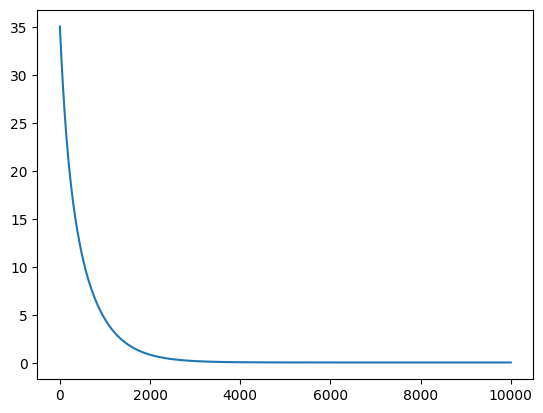

In [179]:
def gradientDescent(X,Y,W,alpha=0.002,iterations=10_000):
    length=len(Y)
    costH=[]
    for i in range(0,iterations):
        if i%1000==0:
            print(f"Iteration {i}")
            print(f"Cost Function {cost_function(X,Y,W)}")
        h=X.dot(W)
        diff=h-Y
        g=X.T.dot(diff)/length
        W=W-alpha*g
        cost=cost_function(X,Y,W)
        costH.append(cost)
    return W,costH
W2,cost=gradientDescent(X,y,W)
plt.plot(cost)

In [198]:
data["prediction"]=X.dot(W2)

/tmp/ipykernel_18011/1004247754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["prediction"]=X.dot(W2)


In [163]:
(data["prediction"]-data["Qiymet"]).max()

nan

In [191]:
data

,Buraxilish ili,Yurush,Qiymet
0,-0.162484,0.715888,-0.191676
1,2.652017,-1.472811,2.815558
2,0.400416,1.575615,-0.250282
3,-0.350117,2.296725,-0.396798
4,0.025150,0.168713,-0.177024
...,...,...,...
1323,-0.725384,0.375976,-0.462730
1324,-1.100651,0.002902,-0.645874
1325,-0.350117,-0.063422,-0.308888
1326,0.025150,-0.602306,-0.279585


In [184]:
yurus=366000
il=1999

yurus_n=(yurus-data_r["Yurush"].mean())/data_r["Yurush"].std()
il_n=(il-data_r["Buraxilish ili"].mean())/data_r["Buraxilish ili"].std()
predicted=W2[0]+W2[1]*il_n+W2[2]*yurus_n
data_r["Qiymet"].std()*predicted+data_r["Qiymet"].mean()

12372.206253702821

In [200]:
data

,Buraxilish ili,Yurush,Qiymet,prediction
0,-0.162484,0.715888,-0.191676,-0.297400
1,2.652017,-1.472811,2.815558,2.012682
2,0.400416,1.575615,-0.250282,-0.196403
3,-0.350117,2.296725,-0.396798,-0.850672
4,0.025150,0.168713,-0.177024,-0.031744
...,...,...,...,...
1323,-0.725384,0.375976,-0.462730,-0.543035
1324,-1.100651,0.002902,-0.645874,-0.666038
1325,-0.350117,-0.063422,-0.308888,-0.193963
1326,0.025150,-0.602306,-0.279585,0.182792


In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
LinearRegression().fit(data.iloc[:,:2],data.iloc[:,2]).predict(data.iloc[:,:2])

array([-0.20182606,  2.34095211,  0.18561911, ..., -0.28498084,
        0.07711753, -0.58416369])

In [197]:
data

,Buraxilish ili,Yurush,Qiymet
0,-0.162484,0.715888,-0.191676
1,2.652017,-1.472811,2.815558
2,0.400416,1.575615,-0.250282
3,-0.350117,2.296725,-0.396798
4,0.025150,0.168713,-0.177024
...,...,...,...
1323,-0.725384,0.375976,-0.462730
1324,-1.100651,0.002902,-0.645874
1325,-0.350117,-0.063422,-0.308888
1326,0.025150,-0.602306,-0.279585


In [189]:
yurus=20_000
il=2005
qiymet =15000
predicted=W2[0]+W2[1]*il_n+W2[2]*yurus_n
yurus_n=(yurus-data_r["Yurush"].mean())/data_r["Yurush"].std()
il_n=(il-data_r["Buraxilish ili"].mean())/data_r["Buraxilish ili"].std()
data_r["Qiymet"].std()*predicted+data_r["Qiymet"].mean()

12372.206253702821

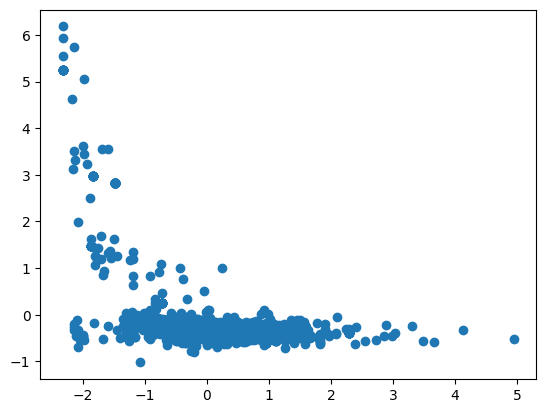

In [209]:
fig,axis=plt.subplots()
axis.scatter(data["Yurush"],data["Qiymet"])


[ 0 11  5]
Iteration 0
Cost Function 35.20449774380465
Iteration 1000
Cost Function 0.439418919997543
Iteration 2000
Cost Function 0.439418919997543
Iteration 3000
Cost Function 0.439418919997543
Iteration 4000
Cost Function 0.439418919997543
Iteration 5000
Cost Function 0.439418919997543
Iteration 6000
Cost Function 0.439418919997543
Iteration 7000
Cost Function 0.439418919997543
Iteration 8000
Cost Function 0.439418919997543
Iteration 9000
Cost Function 0.439418919997543
[ 5.54344645e-17  5.09091766e-02 -3.16454296e-02]


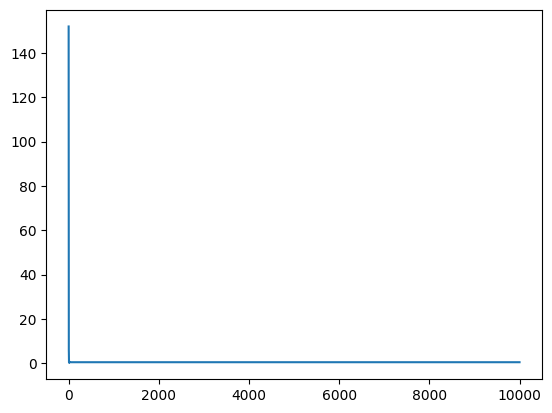

In [34]:
def gradientDescent_Ridge(X,Y,W,alpha=0.1,iterations=10_000,lambda_=0.8):
    length=len(Y)
    costH=[]
    for i in range(0,iterations):
        cost=cost_function(X,Y,W)+lambda_ * np.sum(W**2)
        if i%1000==0:
            print(f"Iteration {i}")
            print(f"Cost Function {cost_function(X,Y,W)}")
        h=X.dot(W)
        diff=h-Y
        g=X.T.dot(diff)/length
        W=W-alpha*g-2*lambda_*W
       
        
        costH.append(cost)
    return W,costH
print(W)
W2,cost=gradientDescent_Ridge(X,y,W)
plt.plot(cost)
print(W2)

[ 0 11  5]
Iteration 0
Cost Function 35.20449774380465
Iteration 1000
Cost Function 0.12497564228195705
Iteration 2000
Cost Function 0.12497564228195705
Iteration 3000
Cost Function 0.12497564228195705
Iteration 4000
Cost Function 0.12497564228195705
Iteration 5000
Cost Function 0.12497564228195705
Iteration 6000
Cost Function 0.12497564228195705
Iteration 7000
Cost Function 0.12497564228195705
Iteration 8000
Cost Function 0.12497564228195705
Iteration 9000
Cost Function 0.12497564228195705
[ 1.02489391e-14  6.04397837e-01 -2.78249196e-01]


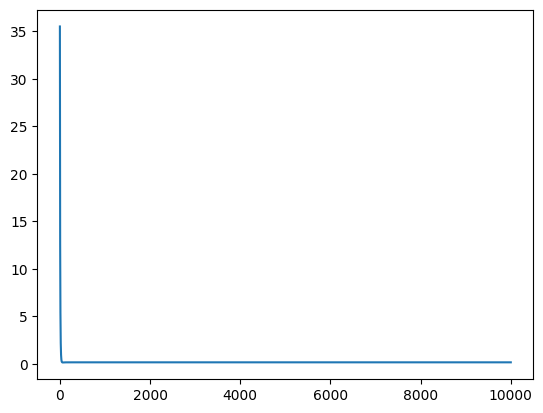

In [190]:
def gradientDescent_lasso(X,Y,W,alpha=0.1,iterations=10_000,lambda_=0.02):
    length=len(Y)
    costH=[]
    for i in range(0,iterations):
        cost=cost_function(X,Y,W)+lambda_ * np.sum(np.abs(W))
        if i%1000==0:
            print(f"Iteration {i}")
            print(f"Cost Function {cost_function(X,Y,W)}")
        h=X.dot(W)
        diff=h-Y
        g=X.T.dot(diff)/length
        W=W-alpha*g-lambda_*np.abs(W)
       
        
        costH.append(cost)
    return W,costH
print(W)
W2,cost=gradientDescent_lasso(X,y,W)
plt.plot(cost)
print(W2)